# Machine Learning

## Aim of this lab

To use different the purposes of machine learning and its uses in cheminformatics and drug discovery. 

### Objectives

* Understand unsupervised learning and Principal Component Analysis


## Background


Principal Component Analysis (PCA) is a diminsionality reduction technique popular for visualizing high dimensional data.  Chemical space, created by chemical descritpors, is often in the hundreds or thousands of dimensions making visualization (in 2 or 3D) impossible.  Often, to get an idea of chemical space, we need to reduce this high-dimensional space to 2 or 3 dimensions, which allows us to plot and vizualize as a scatterplot for example.  

PCA works by transforming a raw dataset (i.e., the chemical descrptors) into `n` components, such that the first component, captures the most variance in the dataset, the second captures the second-most under the constraint it is orthogonal to the first, and so on.  The orthoganlity is often kept as it is a more desirable to have non-correlated variables when doing things such as linear regression.  [Here](https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/index) is a good reference for PCA.  

### Descriptors

Similar to calculating chemical similiarity, PCA can be done on any set of descriptors or fingerprints.  However, just like we saw before its important to standardize if your descriptors are not already on the same range.  

In [1]:
from rdkit import Chem 
from rdkit.Chem import PandasTools
import pandas as pd

,Name,MolSmiles,Bio_Activity,ID,ROMol
0,Mol_0,CC(C)(C)OC(=O)c1c2n(cn1)-c3ccccc3C(=O)N(C2)C,-1.28,,
1,Mol_1,CN1Cc2c(ncn2-c3ccc(cc3C1=O)Cl)C(=O)OC,-0.62,,
2,Mol_2,CCCOC(=O)c1c2n(cn1)-c3ccc(cc3C(=O)N(C2)C)Cl,-0.13,,

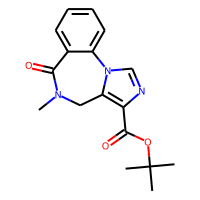
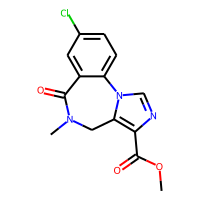
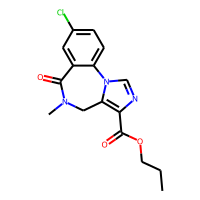

In [3]:
df = PandasTools.LoadSDF('data/DIAZEPAM_w_name.sdf')
df.head(3)

In [4]:
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import Descriptors

def calc_descriptors_from_mol(mol):
    """
    Encode a molecule from a RDKit Mol into a set of descriptors.

    Parameters
    ----------
    mol : RDKit Mol
        The RDKit molecule.

    Returns
    -------
    list
        The set of chemical descriptors as a list.

    """
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in Descriptors.descList])
    return list(calc.CalcDescriptors(mol))

In [5]:
desc_list = []


for mol in df.ROMol.tolist():
    desc = calc_descriptors_from_mol(mol)
    desc_list.append(desc)

    
desc_frame = pd.DataFrame(desc_list)

#### Standardizing Descriptors

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

desc_frame_std = pd.DataFrame(scaler.fit_transform(desc_frame))

desc_frame_std.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,-0.229804,-0.700378,-0.229804,-0.490113,0.400245,-0.844430,-0.945733,-0.839924,-0.427852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.27735,0.0,0.0
1,-0.289638,-0.294427,-0.289638,0.485646,0.362171,-1.039932,-0.961257,-1.048096,-1.365407,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.27735,0.0,0.0
2,-0.196264,-0.003103,-0.196264,0.402070,0.944074,-0.321673,-0.318295,-0.326432,-0.427852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.27735,0.0,0.0
3,-0.191039,-0.115072,-0.191039,0.457694,0.759743,-0.321673,-0.318295,-0.326432,-0.427852,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.27735,0.0,0.0
4,-0.149571,0.202131,-0.149571,0.290525,0.861595,-0.014158,0.003185,-0.017492,-0.115334,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.27735,0.0,0.0


In [7]:
from sklearn.decomposition import PCA

pca = PCA()

latent_space = pca.fit_transform(desc_frame_std)

In [9]:
latent_space.shape

(42, 42)

In [12]:
pca.explained_variance_ratio_.sum()

1.0

In [20]:
%matplotlib inline

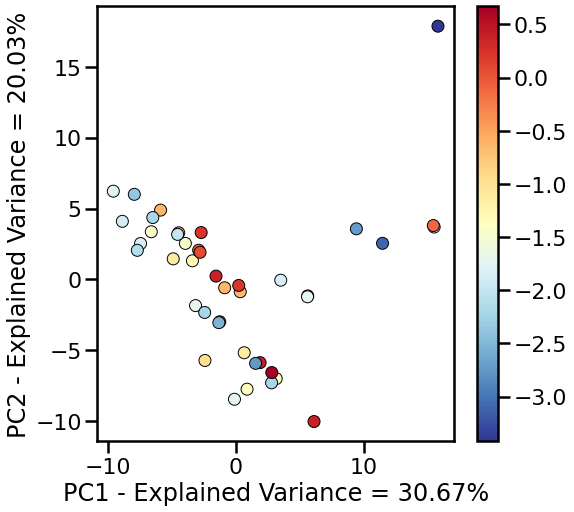

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

sns.set_context('poster')
fig, ax = plt.subplots(figsize=(8,8))

df['Bio_Activity'] = df.Bio_Activity.astype(float)

cm = plt.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=df.Bio_Activity.min(), vmax=df.Bio_Activity.max())
colors = cm(norm(df.Bio_Activity))

scatter = sns.scatterplot(x=latent_space[:, 0], y=latent_space[:, 1], c=[c for c in colors], edgecolor='k')

ax.set_xlabel('PC1 - Explained Variance = {:.2f}%'.format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('PC2 - Explained Variance = {:.2f}%'.format(pca.explained_variance_ratio_[1]*100))

sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig.colorbar(sm)
plt.show()